In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
filename='./data/cow_data.csv'
cow_DF_origin=pd.read_csv(filename)

In [3]:
cow_DF_origin.head(2)

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,비고,결격사유 여부,종류,지역,Unnamed: 14
0,2021.07.23,1,서*호,48928970,암,550.0,3.0,580,360,363,목.배밑혹,1,큰소,경상남도 고성,NaN
1,2021.07.23,2,이*락,102112702,암,744.0,2.0,460,320,353,NaN,0,큰소,경상남도 고성,NaN


In [4]:
cow_DF=cow_DF_origin[['성별','중량','최저가','낙찰가','결격사유 여부','종류']]

In [5]:
cow_DF.head(3)

,성별,중량,최저가,낙찰가,결격사유 여부,종류
0,암,580,360,363,1,큰소
1,암,460,320,353,0,큰소
2,암,340,400,471,1,큰소


In [6]:
cow_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17448 entries, 0 to 17447
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   성별       17448 non-null  object
 1   중량       17448 non-null  int64 
 2   최저가      17448 non-null  int64 
 3   낙찰가      17448 non-null  int64 
 4   결격사유 여부  17448 non-null  int64 
 5   종류       17448 non-null  object
dtypes: int64(4), object(2)
memory usage: 818.0+ KB


In [7]:
# cow_DF['결격사유 여부']=cow_DF['결격사유 여부'].map({0:'0',1:'1'})

cow_DF.describe(include='all')

,성별,중량,최저가,낙찰가,결격사유 여부,종류
count,17448,17448.000000,17448.000000,17448.000000,17448.000000,17448
unique,2,NaN,NaN,NaN,NaN,3
top,암,NaN,NaN,NaN,NaN,일반우
freq,14487,NaN,NaN,NaN,NaN,7655
mean,NaN,499.346114,669.672513,5122.761692,0.112391,NaN
std,NaN,173.233963,297.998572,5350.663271,0.315856,NaN
min,NaN,110.000000,0.000000,57.000000,0.000000,NaN
25%,NaN,310.000000,410.000000,460.000000,0.000000,NaN
50%,NaN,545.000000,560.000000,636.000000,0.000000,NaN
75%,NaN,634.000000,980.000000,10950.000000,0.000000,NaN


In [8]:
cow_DF['종류'].unique()

array(['큰소', '혈통우', '일반우'], dtype=object)

In [9]:
cow_DF['성별'].map({'암':0,'수':1})
cow_DF['종류'].map({'큰소':0,'혈통우':1,'일반우':2})

0        0
1        0
2        0
3        0
4        0
        ..
17443    2
17444    2
17445    2
17446    2
17447    2
Name: 종류, Length: 17448, dtype: int64

In [10]:
cow_DF['성별_N']=cow_DF['성별'].map({'암':0,'수':1})
cow_DF['종류_N']=cow_DF['종류'].map({'큰소':0,'혈통우':1,'일반우':2})

C:\Users\KDP-040\AppData\Local\Temp\ipykernel_20080\2586956060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_DF['성별_N']=cow_DF['성별'].map({'암':0,'수':1})
C:\Users\KDP-040\AppData\Local\Temp\ipykernel_20080\2586956060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_DF['종류_N']=cow_DF['종류'].map({'큰소':0,'혈통우':1,'일반우':2})


In [11]:
cow_DF['낙찰가']=cow_DF['낙찰가'].apply(lambda x: int(x/10) if x>2000 else int(x))

C:\Users\KDP-040\AppData\Local\Temp\ipykernel_20080\4147552831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_DF['낙찰가']=cow_DF['낙찰가'].apply(lambda x: int(x/10) if x>2000 else int(x))


In [12]:
test_DF=cow_DF[['중량','최저가','낙찰가']]

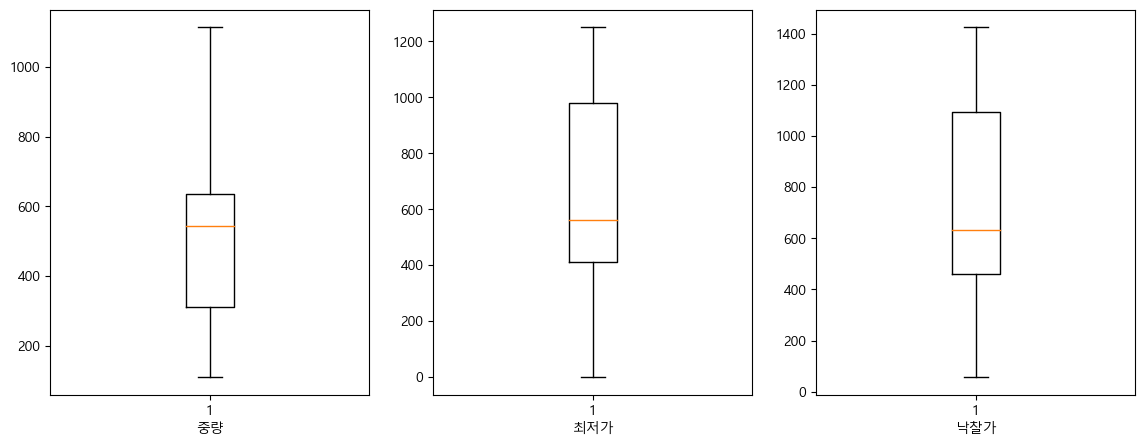

In [13]:
fig=plt.figure(figsize=(14,5))
cnt=1
for i in test_DF.columns:
    plt.subplot(1,3,cnt)
    plt.boxplot(test_DF[i])
    plt.xlabel(i)
    cnt+=1

In [14]:
# 데이터 전처리
# 최저가 0은 제거 필요
(test_DF['최저가']==0).sum()

2

In [15]:
DF=cow_DF[test_DF['최저가']!=0]

In [16]:
DF.corr(numeric_only=True)

,중량,최저가,낙찰가,결격사유 여부,성별_N,종류_N
중량,1.000000,0.768479,0.743921,-0.071168,-0.618653,0.406096
최저가,0.768479,1.000000,0.982841,-0.116901,-0.349993,0.806687
낙찰가,0.743921,0.982841,1.000000,-0.117345,-0.326336,0.805461
결격사유 여부,-0.071168,-0.116901,-0.117345,1.000000,0.018112,-0.087145
성별_N,-0.618653,-0.349993,-0.326336,0.018112,1.000000,-0.057106
종류_N,0.406096,0.806687,0.805461,-0.087145,-0.057106,1.000000


In [17]:
# 상관계수
DF.corr(numeric_only=True)['낙찰가']

중량         0.743921
최저가        0.982841
낙찰가        1.000000
결격사유 여부   -0.117345
성별_N      -0.326336
종류_N       0.805461
Name: 낙찰가, dtype: float64

In [18]:
DF.to_csv('./data/cow_data_clean.csv')

<Axes: xlabel='중량', ylabel='낙찰가'>

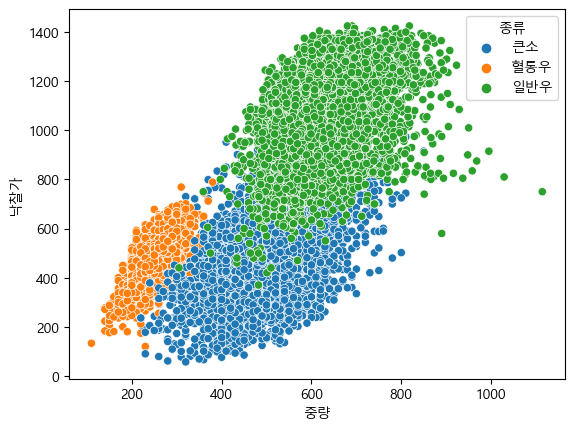

In [19]:
# 시각화
sns.scatterplot(x=DF['중량'],y=DF['낙찰가'],hue=DF['종류'])

In [19]:
feature=DF[['낙찰가','종류_N','성별_N']]
target=DF['중량']
train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.2,random_state=0,stratify=DF['종류'])
train_x.size,train_y.size

(41868, 13956)

In [20]:
# KNN모델
cowKNN=KNeighborsRegressor()

In [21]:
cowKNN.fit(train_x,train_y)

KNeighborsRegressor()

In [22]:
cowKNN.score(train_x,train_y)

0.8526044450505256

In [23]:
cowKNN.score(test_x,test_y) 

0.8298566191537275

In [25]:
# 2021.09.10,201,유*준,141131304,암,1059,6,440,450,489,,0,큰소,경상남도 고성,
cowKNN.predict([[440,0,0]])

c:\Users\KDP-040\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([480.])

In [28]:
import itertools
def combi_list_(df,target_idx):
    combi_list=[]
    num_List=df.columns.to_list()
    num_List.remove(target_idx)
    for r in range(1,len(df.columns)):
        result=list(itertools.combinations(num_List,r))
        for i in result:
            combi_list.append(list(i))
    return combi_list


In [29]:
combi_list=combi_list_(DF[['결격사유 여부','중량','성별_N','종류_N','낙찰가']], '낙찰가')

In [34]:

for i in combi_list:
    for j in range(3,16,2):
        feature=DF[i]
        target=DF['낙찰가']
        train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.2,random_state=0,stratify=DF['종류'])
        cowLi=KNeighborsRegressor(n_neighbors=cnt)
        if train_x.shape[1]==0:
            cowLi.fit(train_x.to_frame(),train_y)
            train_score=cowLi.score(train_x.to_frame(),train_y) #.to_frame()
            test_score=cowLi.score(test_x.to_frame(),test_y) #.to_frame()
            print('-'*100)
            print(f'{i} n_neighbors : {j} train score : {train_score}, test score : test_score')
            
        else:
            cowLi.fit(train_x,train_y)
            train_score=cowLi.score(train_x,train_y) #.to_frame()
            test_score=cowLi.score(test_x,test_y) #.to_frame()
            print('-'*100)
            print(f'{i} n_neighbors : {j} train score : {train_score}, test score : {test_score}')
            

----------------------------------------------------------------------------------------------------
['결격사유 여부'] n_neighbors : 3 train score : -0.014589873365155048, test score : -0.013382082724448408
----------------------------------------------------------------------------------------------------
['결격사유 여부'] n_neighbors : 5 train score : -0.014589873365155048, test score : -0.013382082724448408
----------------------------------------------------------------------------------------------------
['결격사유 여부'] n_neighbors : 7 train score : -0.014589873365155048, test score : -0.013382082724448408
----------------------------------------------------------------------------------------------------
['결격사유 여부'] n_neighbors : 9 train score : -0.014589873365155048, test score : -0.013382082724448408
----------------------------------------------------------------------------------------------------
['결격사유 여부'] n_neighbors : 11 train score : -0.014589873365155048, test score : -0.0133820827244